# Определение перспективного тарифа для телеком-компании

# Задача

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')
display(calls.info())
display(calls.head())
display(internet.info())
display(internet.head(10))
display(messages.info(10))
display(messages.head(10))
display(tariffs.info())
display(tariffs.head())
display(users.info())
display(users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Есть проблемы с типом данных и пропусками, но они не критичные и в дальнейшем будут исправлены. В остальном данные полные

## Предобработка

In [3]:
display(users[users['age']<18])
#Все договора заключаются с совершеннолетними
print(users['tariff'].unique())
#Неявных дубликатов в городах тоже найдено не было

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


['ultra' 'smart']


In [4]:
#обрабатываю данные с пользователями
users['churn_date'] = users['churn_date'].fillna(0)
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [5]:
#выставляю users_id как основной индекс
users.set_index('user_id', inplace=True) 
users.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,1970-01-01,Москва,Иван,Ежов,2018-11-01,smart
1002,59,1970-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,1970-01-01,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,1970-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [6]:
#обрабатываю данные звонков и сразу группирую с месяцами и пользователями
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls['month'] = calls['call_date'].dt.month
display(calls.head())
call_count = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='count', fill_value=0)
call_sum = calls.pivot_table(index=['user_id','month'], values='duration' , aggfunc='sum', fill_value=0)
call_count.columns = ['call_count']
call_sum.columns = ['call_sum']
display(call_count.head())
display(call_sum.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


call_count
user_id month            
1000    5              22
        6              43
        7              47
        8              52
        9              58

call_sum
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466

In [7]:
#делаю тоже самое с сообщениями
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month
messages_count = messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count', fill_value=0)
messages_count.columns = ['messages_count']
display(messages_count.head())

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [8]:
#и интернет-трафиком
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].dt.month
internet['mb_used'] =  np.ceil(internet['mb_used']/1024)
internet['mb_used'] = internet['mb_used'].astype(int)
internet.head()
traf_sum = pd.pivot_table(internet, index=['user_id','month'], values='mb_used', aggfunc='sum', fill_value=0)
traf_sum.columns = ['traf_sum']
display(traf_sum.head())



traf_sum
user_id month          
1000    5             4
        6            49
        7            28
        8            27
        9            26

In [9]:
# формирую общую базу 
merg_base = call_sum.join([call_count ,messages_count, traf_sum, ], how='outer').fillna(0).astype(int)
tar_val = {'smart' : tariffs.loc[:,'messages_included':'rub_per_minute'].loc[0], 'ultra' : tariffs.loc[:,'messages_included':'rub_per_minute'].loc[1]}
merg_base.head(20)

call_sum  call_count  messages_count  traf_sum
user_id month                                                
1000    5           159          22              22         4
        6           172          43              60        49
        7           340          47              75        28
        8           408          52              81        27
        9           466          58              57        26
        10          350          57              73        28
        11          338          43              58        27
        12          333          46              70        19
1001    11          430          59               0        47
        12          414          63               0        35
1002    6           117          15               4        27
        7           214          26              11        45
        8           289          42              13        50
        9           206          36               4        44
        10          212          33              10        36
        11          243          32              16        45
        12          236          33              12        52
1003    8           380          55              37        14
        9           961         134              91        23
        10          855         108              83        28

In [10]:
# считаю выручку по месяцам и объединяю с тарифами и городами
def income(row):
    tariff_name = users.loc[row.name[0], 'tariff']
    messages_inc, mg_per_month_inc, minutes_inc, monthly_fee, per_gb, per_message, per_minute = tar_val[tariff_name]
    result = monthly_fee
    if row['call_sum'] and row['call_sum'] > minutes_inc:
        result_minutes = (row['call_sum'] - minutes_inc) * per_minute
        result += result_minutes
    if row['messages_count'] and row['messages_count'] > messages_inc:
        result_messages = (row['messages_count'] - messages_inc) * per_message
        result += result_messages
    if row['traf_sum'] and row['traf_sum'] > mg_per_month_inc:
        result_mb = ((row['traf_sum'] - mg_per_month_inc) // 1024 + 1) * per_gb
        result += result_mb
    return result
    
merg_base['total'] = merg_base.apply(income, axis = 1)
merg_base = merg_base.join(users['tariff'])
merg_base = merg_base.join(users['city'])
merg_base

call_sum  call_count  messages_count  traf_sum  total tariff  \
user_id month                                                                 
1000    5           159          22              22         4   1950  ultra   
        6           172          43              60        49   1950  ultra   
        7           340          47              75        28   1950  ultra   
        8           408          52              81        27   1950  ultra   
        9           466          58              57        26   1950  ultra   
...                 ...         ...             ...       ...    ...    ...   
1498    10          247          41              42        50    550  smart   
1499    9            70           9              11         5    550  smart   
        10          449          68              48        44    550  smart   
        11          612          74              59        41    913  smart   
        12          492          69              66        40    598  smart   

                      city  
user_id month               
1000    5        Краснодар  
        6        Краснодар  
        7        Краснодар  
        8        Краснодар  
        9        Краснодар  
...                    ...  
1498    10     Владикавказ  
1499    9            Пермь  
        10           Пермь  
        11           Пермь  
        12           Пермь  

[3214 rows x 7 columns]

## Анализ данных

In [11]:
# Расчитываем среднее и стандартное отклонение
merg_base.pivot_table(index='month', columns='tariff').describe()


call_count               call_sum             messages_count  \
tariff      smart      ultra       smart       ultra          smart   
count   12.000000  12.000000   12.000000   12.000000      12.000000   
mean    53.958072  69.123177  386.760499  495.934310      31.413211   
std     10.469205  10.801795   72.262004   77.450072       5.103413   
min     27.676471  41.541667  203.852941  297.125000      18.235294   
25%     53.571631  66.076299  382.304759  474.281331      31.578125   
50%     56.137574  71.898591  401.996739  510.552030      33.638380   
75%     59.650262  75.284607  426.754925  542.483250      33.767242   
max     66.486647  83.316547  478.560831  592.805755      35.994065   

                        total           traf_sum             
tariff      ultra       smart   ultra      smart      ultra  
count   12.000000   12.000000    12.0  12.000000  12.000000  
mean    43.714983  667.110601  1950.0  39.345510  35.867312  
std     12.320470   55.082757     0.0   7.202108   5.445832  
min     21.958333  556.617647  1950.0  21.558824  23.916667  
25%     33.407658  646.846030  1950.0  38.777597  33.982432  
50%     45.082721  669.617949  1950.0  41.359056  37.899553  
75%     53.162979  697.077373  1950.0  43.494728  38.907353  
max     60.611511  776.157270  1950.0  47.249258  42.561151

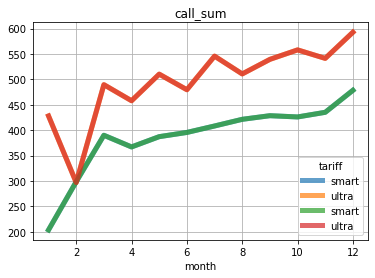

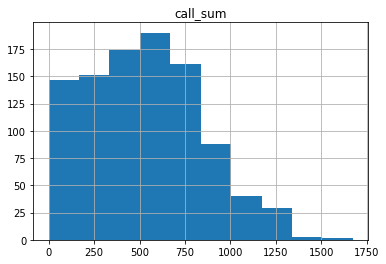

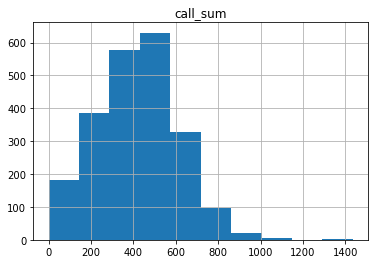

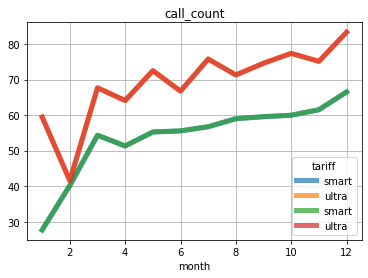

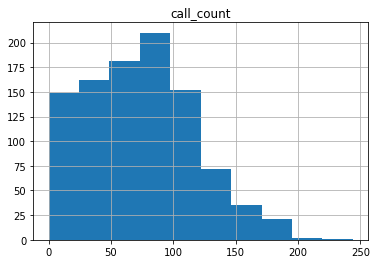

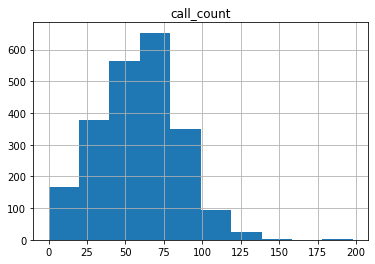

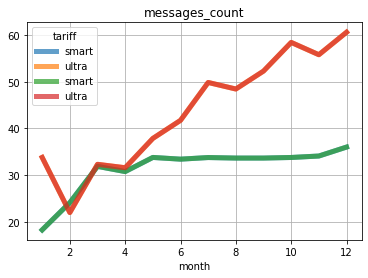

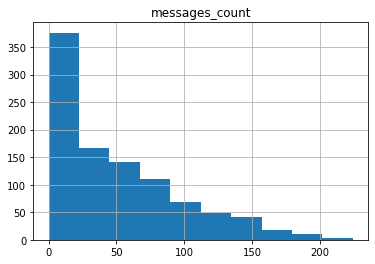

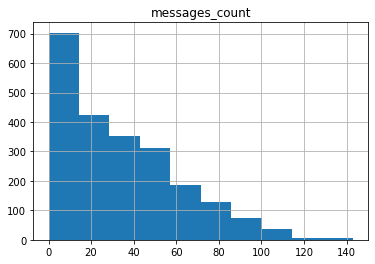

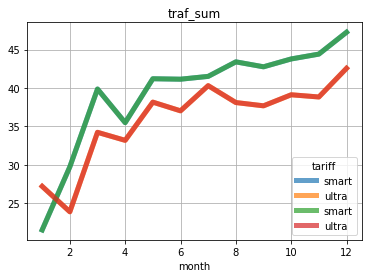

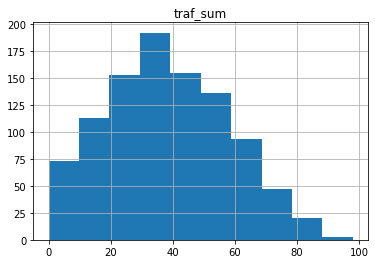

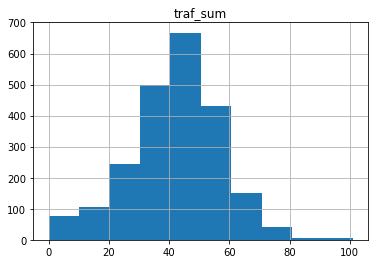

In [12]:
#строю графики графики и гисторграмы по каждому тарифу и по каждой категории

for value in ['call_sum', 'call_count', 'messages_count','traf_sum']:
    ultra_stat = merg_base.pivot_table(index= 'month', columns =  'tariff', values = value)
    smart_stat = merg_base.pivot_table(index= 'month', columns =  'tariff', values = value)
    ax = ultra_stat.plot(linewidth=5, alpha=0.7, title=value)
    smart_stat.plot(linewidth=5, alpha=0.7, ax=ax, grid=True, legend=True)
    merg_base.query('tariff =="ultra"').hist(value)
    merg_base.query('tariff =="smart"').hist(value)

Оба тарифа повышают показатели с каждым месяцем. На графиках видно снижение скрости роста в последние месяца у тарифа смарт, потому что пользователи ограничены тарифом и не хотят переплачивать за доп услуги. 

В феврале заметен переход пользователей с ultra на smart, это видно по изменениям линий графика

Теперь по показателям каждого тарифа:
Пользователи ultra чаще всего тратят на разговоры от 300 до 600 минут, совершая от в среднем по 70 звонков и отправляя в большинстве не более 25 смс, однако есть пользователи которые отправляют их в большом количестве, но их немного. Большинство пользователей укладываются в 30 Гб по интернету

У пользователей смарта на звонки уходит до 550 минут на 75 звонков и 15 смс, на интернет уходит около 15-18 Гб

## Проверка гипотез

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

In [13]:
# H0: средняя выручка пользователей тарифa «Смарт» равна средней выручке пользвателей тарифа «Ультра»
# H1: средняя выручка пользователей Ультра больше выручки смарт

alpha = .05

h0_smart = merg_base.query('tariff == "smart"')
h0_smart = h0_smart['total']

h0_ultra = merg_base.query('tariff == "ultra"')
h0_ultra = h0_ultra['total']  

h0_results = st.ttest_ind(
    h0_smart, 
    h0_ultra)

print('p-значение:', h0_results.pvalue)

if (h0_results.pvalue < alpha and h0_ultra.mean()>h0_smart.mean()):
    print("Отвергаем нулевую гипотезу, выручка пользователей ультра больше")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу, выручка пользователей ультра больше


In [14]:
#H0: средняя выручка пользователей из Москвы равна выручки пользователей из других регионов
#H1 средняя выручка пользователей из Москвы не равна выручки пользователей из других регионов
alpha = .05

h1_msk = merg_base.query('city == "Москва"')
h1_msk = h1_msk['total']

h1_notmsk = merg_base.query('city != "Москва"')
h1_notmsk = h1_notmsk['total']  

h1_results = st.ttest_ind(
    h1_msk, 
    h1_notmsk)

print('p-значение:', h1_results.pvalue)

if (h1_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу, выручки равны")

p-значение: 0.0018497307474415958
Отвергаем нулевую гипотезу


## Вывод

Выручка по тарифам отличается, и очень сильно. Если смотреть по числам, то в пользу тарифа ultra
Об этом говорит сравнение двух выборок пользователей по тарифам.
А регионы от Москвы не отличаются по объёму выручки -  все тратят примерно одинаково. Об этом тоже говорят результаты сравнения двух выборок пользователей по регионам. Связь уже давно равнодоступна в большинстве населённых пунктов. 
<b>Выгодный тариф это Ультра</b>